In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Step 1: Load Excel data
df = pd.read_excel("ode_data.xlsx")

# Extract columns
t = df["t"].values
y = df["y"].values
dy = df["y_prime"].values
d2y = df["y_double_prime"].values

In [3]:
# Step 2: Define residual
def residual(a, b, c, d2y, dy, y):
    return a * d2y + b * dy + c * y

In [4]:
# Step 3: Define loss function (mean squared error)
def loss(params):
    a, b, c = params
    R = residual(a, b, c, d2y, dy, y)
    return np.mean(R**2)

In [5]:
# Step 4: Minimize the loss
initial_guess = [1.0, 1.0, 1.0]
result = minimize(loss, initial_guess)

In [6]:
# Step 5: Extract optimal parameters
a_opt, b_opt, c_opt = result.x
print(f"Optimal coefficients:\na = {a_opt:.5f}, b = {b_opt:.5f}, c = {c_opt:.5f}")

Optimal coefficients:
a = 0.68697, b = 0.34347, c = 1.33099


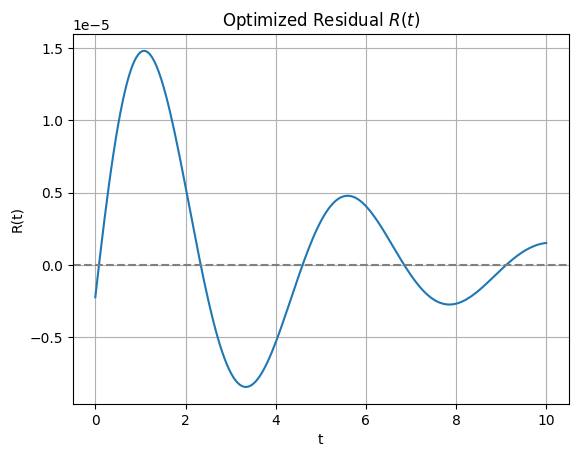

In [7]:
# Step 6: Plot the residuals
R_opt = residual(a_opt, b_opt, c_opt, d2y, dy, y)
plt.plot(t, R_opt)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Optimized Residual $R(t)$")
plt.xlabel("t")
plt.ylabel("R(t)")
plt.grid(True)
plt.show()